Họ và tên: Đậu Thiện Tường\
MSSV: 2174802010639

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Tạo DataFrame
data = {'Name': ["Alice","Bob","Charlie","David","Eva","Frank","Grace","Hannah","Ivan","Jack","Kelly","Liam","Mona","Nina","Oscar"], \
        'Age': [25,30,35,28,22,45,34,31,27,29,33,40,26,32,36],\
        'Salary': [50000,60000,70000,55000,52000,80000,72000,68000,61000,59000,63000,77000,53000,66000,75000]}
df = pd.DataFrame(data)

# Hiển thị dữ liệu
df.head()

,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000
2,Charlie,35,70000
3,David,28,55000
4,Eva,22,52000


In [ ]:
# Lọc các hàng trong Dataframe có "Age" lớn hơn 28
df[df['Age'] > 28]

,Name,Age,Salary
1,Bob,30,60000
2,Charlie,35,70000
5,Frank,45,80000
6,Grace,34,72000
7,Hannah,31,68000
9,Jack,29,59000
10,Kelly,33,63000
11,Liam,40,77000
13,Nina,32,66000
14,Oscar,36,75000


In [ ]:
# Tính giá trị trung bình cột Salary
df["Salary"].mean()

64066.666666666664

In [ ]:
# Nhóm dữ liệu theo cột Age và tính tổng Salary cho mỗi nhóm
df.groupby("Age")["Salary"].sum()

Age
22    52000
25    50000
26    53000
27    61000
28    55000
29    59000
30    60000
31    68000
32    66000
33    63000
34    72000
35    70000
36    75000
40    77000
45    80000
Name: Salary, dtype: int64

In [ ]:
# Sắp xếp DataFrame  cột Salary giảm dần
df.sort_values(by="Salary", ascending=False)

,Name,Age,Salary
5,Frank,45,80000
11,Liam,40,77000
14,Oscar,36,75000
6,Grace,34,72000
2,Charlie,35,70000
7,Hannah,31,68000
13,Nina,32,66000
10,Kelly,33,63000
8,Ivan,27,61000
1,Bob,30,60000


<Axes: xlabel='Age'>

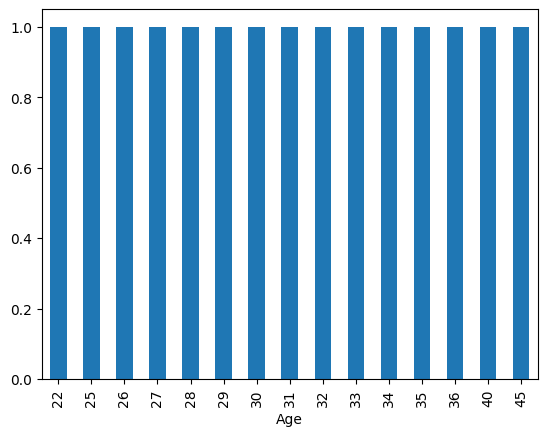

In [ ]:
# Vẽ biểu đồ cột cho cột Age
age = df.groupby('Age')['Age'].agg('count')
age.plot.bar()

<Axes: >

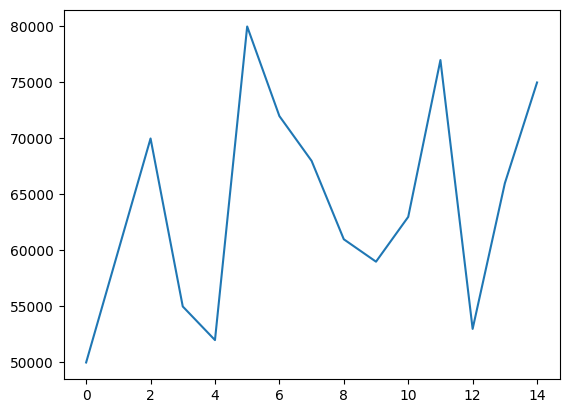

In [107]:
# Vẽ biểu đồ đường cho Salary
df['Salary'].plot.line()

<Axes: ylabel='Age'>

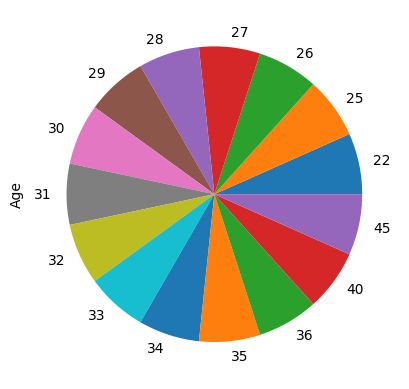

In [ ]:
# Vẽ biểu đồ tròn cho cột Age

# age = df.groupby('Age')['Age'].agg('count')
# plt.pie(age, labels=age.index, autopct='%1.1f%%')
# plt.show()

age.plot.pie()

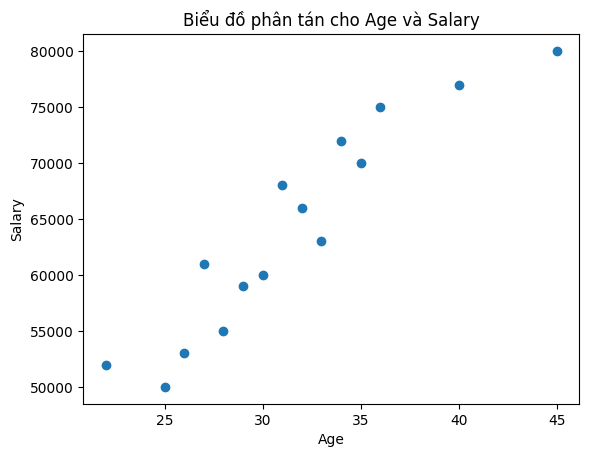

In [ ]:
# Vẽ biểu đồ phân tán cho Age và Salary
plt.scatter(df["Age"], df["Salary"])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Biểu đồ phân tán cho Age và Salary")
plt.show()

In [ ]:
# Kiểm tra xem có giá trị NaN nào trong DataFrame không
df.isnull().sum()

Name      0
Age       0
Salary    0
dtype: int64

In [ ]:
# TẠO MỘT DATAFRAME COPY
df_new = df.copy()

In [ ]:
# Thay thế các giá trị cột Age lớn hơn 30 bằng giá trị trung bình của cột đó
df_new['Age'] = df_new['Age'].apply(lambda x: df_new['Age'].mean() if x > 30 else x)
# df_new.head()
print(df_new)

       Name        Age  Salary
0     Alice  25.000000   50000
1       Bob  30.000000   60000
2   Charlie  31.533333   70000
3     David  28.000000   55000
4       Eva  22.000000   52000
5     Frank  31.533333   80000
6     Grace  31.533333   72000
7    Hannah  31.533333   68000
8      Ivan  27.000000   61000
9      Jack  29.000000   59000
10    Kelly  31.533333   63000
11     Liam  31.533333   77000
12     Mona  26.000000   53000
13     Nina  31.533333   66000
14    Oscar  31.533333   75000


In [ ]:
# Chuẩn hóa (normalize) cột Age về khoảng giá trị từ 0 đến 1
df_new['Age'] = (df_new['Age'] - df_new['Age'].min()) / (df_new['Age'].max() - df_new['Age'].min())
# df_new.head()
print(df_new)

       Name       Age  Salary
0     Alice  0.314685   50000
1       Bob  0.839161   60000
2   Charlie  1.000000   70000
3     David  0.629371   55000
4       Eva  0.000000   52000
5     Frank  1.000000   80000
6     Grace  1.000000   72000
7    Hannah  1.000000   68000
8      Ivan  0.524476   61000
9      Jack  0.734266   59000
10    Kelly  1.000000   63000
11     Liam  1.000000   77000
12     Mona  0.419580   53000
13     Nina  1.000000   66000
14    Oscar  1.000000   75000


In [ ]:
# Tạo một cột mới Age_group phân loại tuổi thành Young, Middle-aged, Old dựa trên giá trị cột Age
def age_group(age):
  if age < 30:
    return "Young"
  elif age >= 30 and age < 60:
    return "Middle-aged"
  else:
    return "Old"

df["Age_group"] = df["Age"].apply(age_group)
# df.head()
print(df)

       Name  Age  Salary    Age_group
0     Alice   25   50000        Young
1       Bob   30   60000  Middle-aged
2   Charlie   35   70000  Middle-aged
3     David   28   55000        Young
4       Eva   22   52000        Young
5     Frank   45   80000  Middle-aged
6     Grace   34   72000  Middle-aged
7    Hannah   31   68000  Middle-aged
8      Ivan   27   61000        Young
9      Jack   29   59000        Young
10    Kelly   33   63000  Middle-aged
11     Liam   40   77000  Middle-aged
12     Mona   26   53000        Young
13     Nina   32   66000  Middle-aged
14    Oscar   36   75000  Middle-aged


In [ ]:
# Tính toán tỷ lệ phần trăm thay đổi (percentage change) của cột Salary
df['Percentage_change'] = df['Salary'].pct_change()
# df.head()
print(df)

       Name  Age  Salary    Age_group  Percentage_change
0     Alice   25   50000        Young                NaN
1       Bob   30   60000  Middle-aged           0.200000
2   Charlie   35   70000  Middle-aged           0.166667
3     David   28   55000        Young          -0.214286
4       Eva   22   52000        Young          -0.054545
5     Frank   45   80000  Middle-aged           0.538462
6     Grace   34   72000  Middle-aged          -0.100000
7    Hannah   31   68000  Middle-aged          -0.055556
8      Ivan   27   61000        Young          -0.102941
9      Jack   29   59000        Young          -0.032787
10    Kelly   33   63000  Middle-aged           0.067797
11     Liam   40   77000  Middle-aged           0.222222
12     Mona   26   53000        Young          -0.311688
13     Nina   32   66000  Middle-aged           0.245283
14    Oscar   36   75000  Middle-aged           0.136364


In [ ]:
# Tìm các giá trị trùng lặp trong DataFrame dựa trên cột Name và loại bỏ các hàng trùng lặp, giữ lại hàng đầu tiên
df.drop_duplicates(subset='Name', keep='first', inplace=True)
print(df)

       Name  Age  Salary    Age_group  Percentage_change
0     Alice   25   50000        Young                NaN
1       Bob   30   60000  Middle-aged           0.200000
2   Charlie   35   70000  Middle-aged           0.166667
3     David   28   55000        Young          -0.214286
4       Eva   22   52000        Young          -0.054545
5     Frank   45   80000  Middle-aged           0.538462
6     Grace   34   72000  Middle-aged          -0.100000
7    Hannah   31   68000  Middle-aged          -0.055556
8      Ivan   27   61000        Young          -0.102941
9      Jack   29   59000        Young          -0.032787
10    Kelly   33   63000  Middle-aged           0.067797
11     Liam   40   77000  Middle-aged           0.222222
12     Mona   26   53000        Young          -0.311688
13     Nina   32   66000  Middle-aged           0.245283
14    Oscar   36   75000  Middle-aged           0.136364


In [ ]:
# Save to csv
df.to_csv('BaiKiemTraSo1.csv', index=False)